**2 Neutrons in the gravitational field (Homework)**

The Schrödinger equation for the gravitational potential $V(z) = mgz$ is given by  
$$ \Psi''(z) + \frac{2m}{\hbar^2} (E-mgz)\Psi(z) = 0 $$  
Using the length units  
$$ x = \frac{z}{z_0} \quad \text{with} \quad z_0 = \left(\frac{\hbar^2}{2m^2g}\right)^\frac{1}{3}$$  
and  
$$ \varepsilon = \frac{E}{E_0} \quad \text{with} \quad E_0 = mgz_0$$  
the equation can be written as  
$$ \Psi''(x) + (\varepsilon - x) \Psi(x) = 0 $$
<sub>Source: <a href="https://www.physi.uni-heidelberg.de/Publications/dipl_krantz.pdf">https://www.physi.uni-heidelberg.de/Publications/dipl_krantz.pdf</a>, page 11</sub>

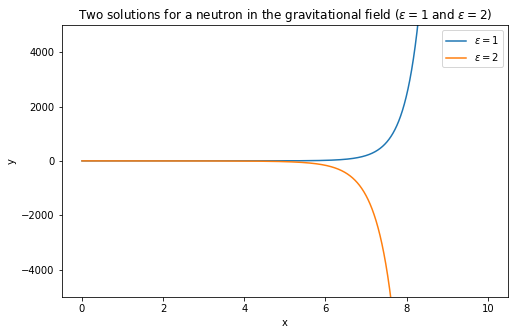

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Appends yn+1 to y and returns it for given yn, xn
# k is the function in the schrodinger equation
def numerov_step(y, k, x):
    yn1 = 1/(1+1/12 * h**2 * k(x+h)) * (2 * y[-1] * (1- 5/12 * h**2 * k(x)) - y[-2] * (1+ 1/12 * h**2 * k(x-h)))
    y.append(yn1)
    return y

# Run steps forward n times
def numerov_run(y0, x0, k, n):
    y = y0
    for i in range(0,n):
        numerov_step(y, k, x0+i*h)
    return y

# Set initial values
t = 10
x0 = 0

# Define parameters for algorithm
h = 0.001
n = int(t/h)
a = 1

# First result
epsilon = 1

def k(x):
    return epsilon - x
# Use initioal conditions from task 1
y = numerov_run([a, a-h**2 * k(x0) * a / 2], x0, k, n)
# Generate x values
x = []
for i in range(0,n+2):
    x.append(x0 + i*h)
x = np.array(x)
# Plot the first result
plt.figure(figsize=(8,5))
plt.title(r"Two solutions for a neutron in the gravitational field ($\varepsilon = 1$ and $\varepsilon = 2$)")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-5000,5000))
plt.plot(x,y, label=r"$\varepsilon = 1$")
# Second result
epsilon = 2
y = numerov_run([a, a-h**2 * k(x0) * a / 2], x0, k, n)
plt.plot(x,y, label=r"$\varepsilon = 2$")
plt.legend()
plt.show()